In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 2.5})
sns.set_style("darkgrid")
np.random.seed(123)  # For reproducibility

In [4]:
hindi_sad = pd.read_csv('song_features_hindi_sad_score.csv', index_col =0)

### train-test split for 1 hold-out test set untouched by learning algorithm

In [5]:
hindi_sad_train, hindi_sad_test = train_test_split(hindi_sad, test_size=0.1)

In [6]:
hindi_sad_train.head()

,SET,Code,Unnamed: 0.1,id,artist,album,name,length,danceability,acousticness,...,speechiness,tempo,key,time_signature,mood,Score,sad_score,happy_score,angry_score,fear_score
4,E,UHIS1,33,30yySOIXHZYx94sLAySy2j,A.R. Rahman,Dil Se (Original Motion Picture Soundtrack),Dil Se Re,405706,0.844,0.00882,...,0.0691,105.986,9,4,Sad,NaN,0.5,-0.5,0.5,1.0
17,R,UHIS2,97,2S6N9pbnkhQRyAx80HmF79,Shraddha Kapoor,Best Of Shraddha Kapoor,"Banjaara (From ""Ek Villain"")",336567,0.657,0.71300,...,0.0306,116.000,1,4,Sad,NaN,0.5,0.0,0.0,-1.0
8,I,UHIS4,157,0MeoxIZvXjyEgeGTMyZc9T,Arijit Singh,Arijit Singh Broken Strings,"Duaa (From ""Shanghai"")",260138,0.554,0.53600,...,0.0379,137.921,5,4,Sad,NaN,-0.5,0.5,-1.0,-0.5
7,H,UHIS16,252,77H2kEmaw3uiLgPozzIsqv,Amit Trivedi,Gunjan Saxena: The Kargil Girl,Dori Tutt Gaiyaan,231211,0.397,0.92500,...,0.0497,75.679,10,4,Sad,NaN,-0.5,-0.5,0.0,0.0
19,T,UHIS5,123,3hp6JfJIxkv3sl7E6p7DQj,Amit Trivedi,Fitoor,Yeh Fitoor Mera,283070,0.449,0.38700,...,0.0272,163.747,4,3,Sad,NaN,0.0,0.0,0.0,-1.0


In [7]:
hindi_sad_test.head()

,SET,Code,Unnamed: 0.1,id,artist,album,name,length,danceability,acousticness,...,speechiness,tempo,key,time_signature,mood,Score,sad_score,happy_score,angry_score,fear_score
14,O,UHIS7,251,2L2YNB3YIletW4fUtwphDv,Pritam,Love Aaj Kal (Original Motion Picture Soundtrack),Shayad - Reprise,245735,0.432,0.904,...,0.0320,135.837,8,4,Sad,NaN,0.5,-0.5,0.0,0.0
5,F,UHIS6,277,0p83RJy9EZ0hlg82xcXH7f,Sachet Tandon,"Dilbara (From ""Pati Patni Aur Woh"")","Dilbara (From ""Pati Patni Aur Woh"")",247682,0.304,0.254,...,0.0497,89.991,0,4,Sad,NaN,2.0,-1.0,0.0,0.0


### Multivariate Linear Regression - define the regression problem in higher dimensions

In [8]:
inputs = ['danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'valence', 'loudness', 'speechiness', 'tempo']
outputs = 'sad_score'

In [9]:
x_train = hindi_sad_train[hindi_sad_train.columns.intersection(inputs)]
x_train.head()

,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo
4,0.844,0.00882,0.442,0.000498,0.0879,0.436,-16.540,0.0691,105.986
17,0.657,0.71300,0.489,0.000000,0.1240,0.399,-6.829,0.0306,116.000
8,0.554,0.53600,0.578,0.000055,0.1100,0.550,-7.718,0.0379,137.921
7,0.397,0.92500,0.427,0.011700,0.1080,0.288,-9.144,0.0497,75.679
19,0.449,0.38700,0.421,0.000108,0.1100,0.203,-8.920,0.0272,163.747


In [11]:
y_train = hindi_sad_train[outputs]

In [12]:
x_test = hindi_sad_test[hindi_sad_test.columns.intersection(inputs)]

In [13]:
y_test = hindi_sad_test[outputs]

### Train the regressor in these new variables 

In [16]:
regressor = LinearRegression()
regressor.fit(
    X=x_train,
    y=y_train,
)
y_hat_train = regressor.predict(x_train)
y_hat_test = regressor.predict(x_test)

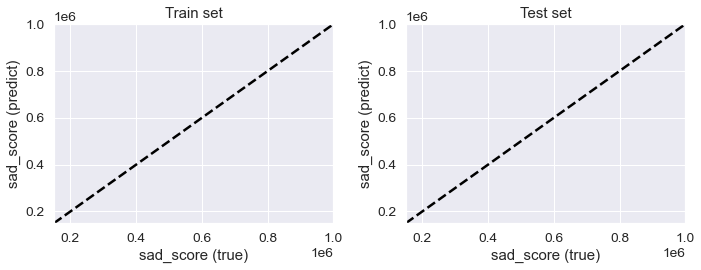

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train,
    y=y_hat_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test,
    y=y_hat_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.set_xlim(1.5*10**5, 10**6)
    a.set_ylim(1.5*10**5, 10**6)
    a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

### Evaluate linear regressor

In [19]:
from sklearn.metrics import mean_squared_error
def rmse_scaled(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    scale = np.sqrt(np.mean(y_true**2))
    return rmse/scale

In [20]:
print(
    f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_test)} (Test)'
)

Scaled RMSE: 
 0.8507985476580792 (Train)     
 1.1891825508452223 (Test)


### Try with polynomial regressor of degree 3

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
phi = PolynomialFeatures(degree=3)
x_poly_train = phi.fit_transform(x_train)
x_poly_test = phi.fit_transform(x_test)

In [26]:
regressor_poly = LinearRegression()
regressor_poly.fit(
    X=x_poly_train,
    y=y_train,
)
y_hat_poly_train = regressor_poly.predict(x_poly_train)
y_hat_poly_test = regressor_poly.predict(x_poly_test)

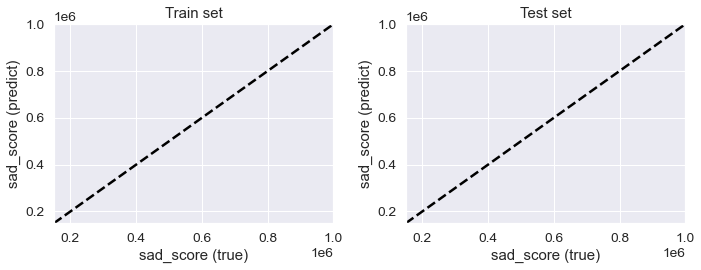

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.scatterplot(
    x=y_train,
    y=y_hat_poly_train,
    ax=ax[0],
    alpha=0.5,
)

sns.scatterplot(
    x=y_test,
    y=y_hat_poly_test,
    ax=ax[1],
    alpha=0.5,
)

for a in ax:
    a.set_xlabel(f'{outputs} (true)')
    a.set_ylabel(f'{outputs} (predict)')
    a.set_xlim(1.5*10**5, 10**6)
    a.set_ylim(1.5*10**5, 10**6)
    a.plot(a.get_xlim(), a.get_ylim(), ls='--', c='k')


    
ax[0].set_title('Train set')
ax[1].set_title('Test set')

fig.tight_layout()

In [28]:
print(
    f'Scaled RMSE: \n {rmse_scaled(y_train, y_hat_poly_train)} (Train) \
    \n {rmse_scaled(y_test, y_hat_poly_test)} (Test)'
)

Scaled RMSE: 
 8.365746094476189e-14 (Train)     
 3.3346501081431774 (Test)
